---
title: "Lab 5: Insurance Costs"
format: 
  html:
    embed-resources: true
execute:
  echo: true
code-fold: true
author: James Compagno
jupyter: python3
---

# Part One: Data Exploration

The dataset we will study for this assignment contains information about health insurance costs for individuals with no dependents (children) in the United States. The information contained in the data is:

    -Age of primary beneficiary

    -Gender of primary beneficiary (only female, male recorded)

    -Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

    -Whether the beneficiary smokes

    -The beneficiary’s residential area in the US, northeast, southeast, southwest, northwest.

    -Individual medical costs billed by health insurance

You can find this data at: https://www.dropbox.com/s/bocjjyo1ehr5auz/insurance_costs_1.csv?dl=1

In [1]:
import pandas as pd
import numpy as np
import plotnine as p9
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## 1.Read in the dataset, and display some summaries of the data.

In [2]:
# Data Import
url = "https://www.dropbox.com/s/bocjjyo1ehr5auz/insurance_costs_1.csv?dl=1"
df = pd.read_csv(url)
#df = pd.read_csv("insurance_costs_1.csv")
df.head()

,age,sex,bmi,smoker,region,charges
0,19,female,27.900,yes,southwest,16884.92400
1,33,male,22.705,no,northwest,21984.47061
2,32,male,28.880,no,northwest,3866.85520
3,31,female,25.740,no,southeast,3756.62160
4,60,female,25.840,no,northwest,28923.13692


In [3]:
len(df)

431

## 2. Fix any concerns you have about the data.

In [4]:
dat = pd.get_dummies(df)

In [5]:
dat.head()

,age,bmi,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,16884.92400,True,False,False,True,False,False,False,True
1,33,22.705,21984.47061,False,True,True,False,False,True,False,False
2,32,28.880,3866.85520,False,True,True,False,False,True,False,False
3,31,25.740,3756.62160,True,False,True,False,False,False,True,False
4,60,25.840,28923.13692,True,False,True,False,False,True,False,False


## 3. Make up to three plots comparing the response variable (charges) to one of the predictor variables. Briefly discuss each plot.

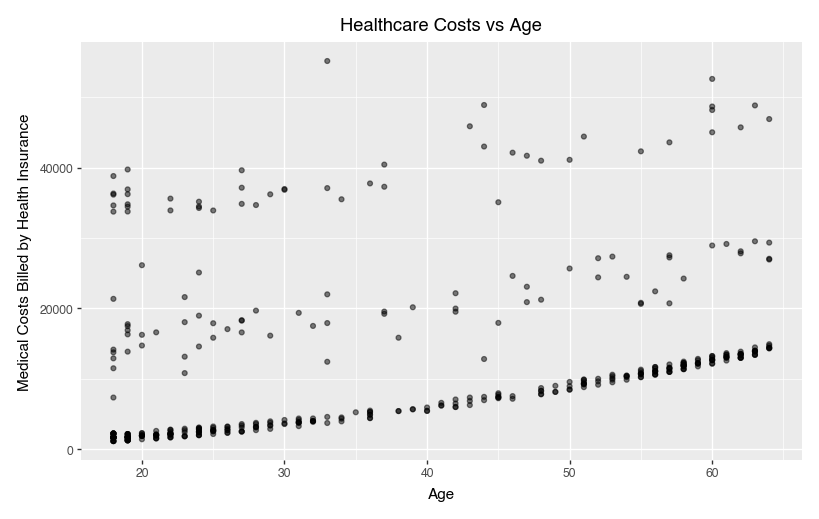

In [6]:
p1 = (p9.ggplot(dat,
    p9.aes(
        x='age',
        y='charges'))
    + p9.geom_point(alpha=0.5)
    + p9.labs(
        title='Healthcare Costs vs Age',
        x='Age',
        y='Medical Costs Billed by Health Insurance',
      )
    + p9.theme(
        figure_size=(8, 5),
        plot_caption=p9.element_text(size=8, ha='center', va='top'))
    )
p1

This plot shows what is likely the difference in billing between healthy people who dont use their insurance much and those who do not (as represented by the gap between the bottom cluster and those on top). It is worth noting that costs increase over time even for the healthy but its still cheaper to be healthy and old than young and sick.

/opt/anaconda3/lib/python3.13/site-packages/plotnine/ggplot.py:623: PlotnineWarning: Saving 8 x 5 in image.
/opt/anaconda3/lib/python3.13/site-packages/plotnine/ggplot.py:624: PlotnineWarning: Filename: p2.png


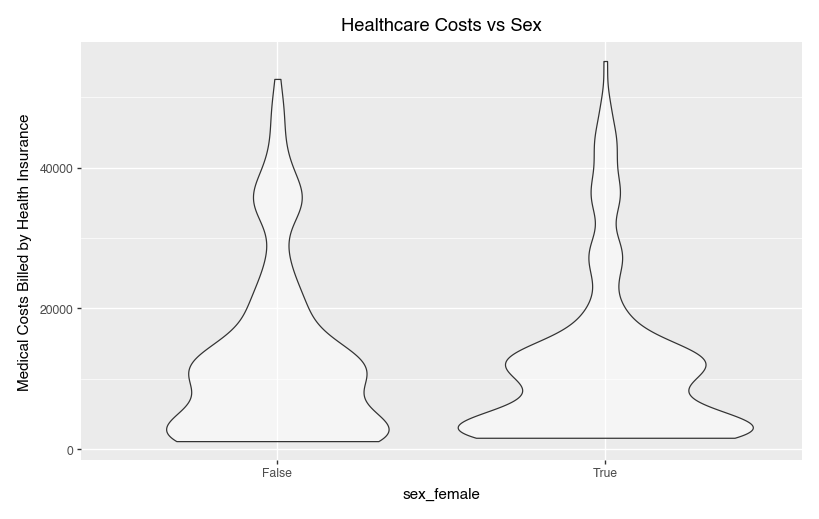

In [7]:
p2 = (p9.ggplot(dat, 
    p9.aes(
        x='sex_female', 
        y='charges'))
      + p9.geom_violin(alpha=0.5)
      + p9.labs(
          title='Healthcare Costs vs Sex',
          x='sex_female',
          y='Medical Costs Billed by Health Insurance'
      )
      + p9.theme(
          figure_size=(8, 5),
          plot_caption=p9.element_text(size=8, ha='center', va='top')
      )
     )
p2.save("p2.png", dpi=300)
p2

It is interesting that female is more bottom heavy for costs than for male, however it has a higher ceiling. 

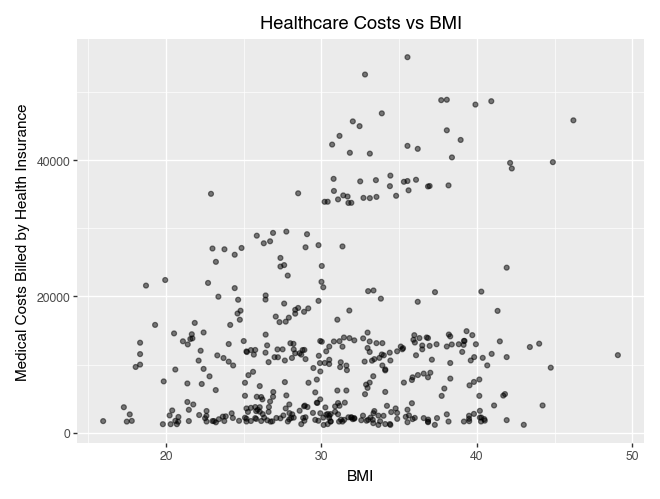

In [8]:
p3 = (p9.ggplot(dat, 
        p9.aes(
                x='bmi', 
                y='charges'))
      + p9.geom_point(alpha=0.5)
      + p9.labs(
                title='Healthcare Costs vs BMI',
                x='BMI', 
                y='Medical Costs Billed by Health Insurance')
        )
p3

It is intresting to note that even those with a higher BMI can still have lower healthcare costs. As a matter of fact it seems that there is only an correlation between higher BMIs and higher healthcare costs for some individuals. If the data was made so that Medical Costs cutoff at 20000 there might not be much of a positive trend at all.

# Part Two: Simple Linear Models

## 1. Construct a simple linear model to predict the insurance charges from the beneficiary’s age. Discuss the model fit, and interpret the coefficient estimates.

In [9]:
#Prep Data for training
X = dat.drop(columns=['charges'])
y = dat['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=67)

In [10]:
#Model Storage 
model_library = {}
records = []

In [11]:
# Model
cols_Physical = ['age']
model_library["Linear_Age_Only"] = LinearRegression().fit(X_train[cols_Physical], y_train)

# Train
y_train_pred = model_library["Linear_Age_Only"].predict(X_train[cols_Physical])
mse = mean_squared_error(y_train, y_train_pred) 
records.append({
    "Model": "Linear_Age_Only", "Split": "Train",
    "RMSE": np.sqrt(mse), "MSE": mse, "R2": r2_score(y_train, y_train_pred)  
})

# Test
y_test_pred = model_library["Linear_Age_Only"].predict(X_test[cols_Physical]) 
mse = mean_squared_error(y_test, y_test_pred) 
records.append({
    "Model": "Linear_Age_Only", "Split": "Test",
    "RMSE": np.sqrt(mse), "MSE": mse, "R2": r2_score(y_test, y_test_pred)
})

# Display Data - Cumulative 
cumulative_models = (pd.DataFrame(records))
cumulative_models

,Model,Split,RMSE,MSE,R2
0,Linear_Age_Only,Train,10798.323624,1.166038e+08,0.094989
1,Linear_Age_Only,Test,12933.868232,1.672849e+08,0.088449


Interpretation: Age alone is insuffienct in explaining charges, MSE and RMSE are unacceptably high and R2 way too low. This was seen by the seperation in the age data. 

## 2. Make a model that also incorporates the variable sex. Report your results.

In [12]:
# Model
cols_Physical = ['age', 'sex_female']
model_library["Linear_Age_Sex"] = LinearRegression().fit(X_train[cols_Physical], y_train)

# Train
y_train_pred = model_library["Linear_Age_Sex"].predict(X_train[cols_Physical])
mse = mean_squared_error(y_train, y_train_pred)
records.append({
    "Model": "Linear_Age_Sex", "Split": "Train",
    "RMSE": np.sqrt(mse), "MSE": mse, "R2": r2_score(y_train, y_train_pred)
})

# Test
y_test_pred = model_library["Linear_Age_Sex"].predict(X_test[cols_Physical])
mse = mean_squared_error(y_test, y_test_pred)
records.append({
    "Model": "Linear_Age_Sex", "Split": "Test",
    "RMSE": np.sqrt(mse), "MSE": mse, "R2": r2_score(y_test, y_test_pred)
})

# Display Data - Cumulative 
cumulative_models = (pd.DataFrame(records))
cumulative_models

,Model,Split,RMSE,MSE,R2
0,Linear_Age_Only,Train,10798.323624,1.166038e+08,0.094989
1,Linear_Age_Only,Test,12933.868232,1.672849e+08,0.088449
2,Linear_Age_Sex,Train,10797.945160,1.165956e+08,0.095052
3,Linear_Age_Sex,Test,12925.397734,1.670659e+08,0.089643


## 3. Now make a model that does not include sex, but does include smoker. Report your results.

In [13]:
# Model
cols_Physical = ['age', 'smoker_yes']
model_library["Linear_Age_Smoker"] = LinearRegression().fit(X_train[cols_Physical], y_train)

# Train
y_train_pred = model_library["Linear_Age_Smoker"].predict(X_train[cols_Physical])
mse = mean_squared_error(y_train, y_train_pred)
records.append({
    "Model": "Linear_Age_Smoker", "Split": "Train",
    "RMSE": np.sqrt(mse), "MSE": mse, "R2": r2_score(y_train, y_train_pred)
})

# Test
y_test_pred = model_library["Linear_Age_Smoker"].predict(X_test[cols_Physical])
mse = mean_squared_error(y_test, y_test_pred)
records.append({
    "Model": "Linear_Age_Smoker", "Split": "Test",
    "RMSE": np.sqrt(mse), "MSE": mse, "R2": r2_score(y_test, y_test_pred)
})

# Display Data - Cumulative 
cumulative_models = (pd.DataFrame(records)
       .reset_index(drop=True))
cumulative_models

,Model,Split,RMSE,MSE,R2
0,Linear_Age_Only,Train,10798.323624,1.166038e+08,0.094989
1,Linear_Age_Only,Test,12933.868232,1.672849e+08,0.088449
2,Linear_Age_Sex,Train,10797.945160,1.165956e+08,0.095052
3,Linear_Age_Sex,Test,12925.397734,1.670659e+08,0.089643
4,Linear_Age_Smoker,Train,5822.538823,3.390196e+07,0.736873
5,Linear_Age_Smoker,Test,5841.097443,3.411842e+07,0.814086


## 4.Which model (Q2 or Q3) do you think better fits the data? Justify your answer by calculating the MSE for each model, and also by comparing R-squared values.

In [14]:
cumulative_models = (pd.DataFrame(records)
       .reset_index(drop=True))
cumulative_models

,Model,Split,RMSE,MSE,R2
0,Linear_Age_Only,Train,10798.323624,1.166038e+08,0.094989
1,Linear_Age_Only,Test,12933.868232,1.672849e+08,0.088449
2,Linear_Age_Sex,Train,10797.945160,1.165956e+08,0.095052
3,Linear_Age_Sex,Test,12925.397734,1.670659e+08,0.089643
4,Linear_Age_Smoker,Train,5822.538823,3.390196e+07,0.736873
5,Linear_Age_Smoker,Test,5841.097443,3.411842e+07,0.814086


Model 3 (Linear_Age_Smoker) is siginificantly better than Model 2 or Model 1, not only are its error terms an order of magnitude lower its R2 value is signifiantly better 

# Part Three: Multiple Linear Models

Now let’s consider including multiple quantitative predictors.

## 1. Fit a model that uses age and bmi as predictors. (Do not include an interaction term, age*bmi, between these two.) Report your results. How does the MSE compare to the model in Part Two Q1? How does the R-squared compare?

In [15]:
# Model
cols_Physical = ['age', 'bmi']
model_library["Linear_Age_BMI"] = LinearRegression().fit(X_train[cols_Physical], y_train)

# Train
y_train_pred = model_library["Linear_Age_BMI"].predict(X_train[cols_Physical])
mse = mean_squared_error(y_train, y_train_pred)
records.append({
    "Model": "Linear_Age_BMI", "Split": "Train",
    "RMSE": np.sqrt(mse), "MSE": mse, "R2": r2_score(y_train, y_train_pred)
})

# Test
y_test_pred = model_library["Linear_Age_BMI"].predict(X_test[cols_Physical])
mse = mean_squared_error(y_test, y_test_pred)
records.append({
    "Model": "Linear_Age_BMI", "Split": "Test",
    "RMSE": np.sqrt(mse), "MSE": mse, "R2": r2_score(y_test, y_test_pred)
})

# Display Data - Cumulative 
cumulative_models = (pd.DataFrame(records))
cumulative_models

,Model,Split,RMSE,MSE,R2
0,Linear_Age_Only,Train,10798.323624,1.166038e+08,0.094989
1,Linear_Age_Only,Test,12933.868232,1.672849e+08,0.088449
2,Linear_Age_Sex,Train,10797.945160,1.165956e+08,0.095052
3,Linear_Age_Sex,Test,12925.397734,1.670659e+08,0.089643
4,Linear_Age_Smoker,Train,5822.538823,3.390196e+07,0.736873
5,Linear_Age_Smoker,Test,5841.097443,3.411842e+07,0.814086
6,Linear_Age_BMI,Train,10735.237201,1.152453e+08,0.105532
7,Linear_Age_BMI,Test,12639.908714,1.597673e+08,0.129413


While all 3 metrics (RMSE, MSE, & R2) are better in the new Linear_Age_BMI model compared to Linear_Age_Only are better, both are very bad at describing the data. 

## 2. Perhaps the relationships are not linear. Fit a model that uses age and age^2 as predictors. How do the MSE and R-squared compare to the model in P2 Q1?

In [16]:
# Transformation
X['age2'] = X['age'] ** 2
X_train['age2'] = X_train['age'] ** 2
X_test['age2'] = X_test['age'] ** 2

# Model
cols_Physical = ['age', 'age2']
model_library["Quadratic_Age_Age2"] = LinearRegression().fit(X_train[cols_Physical], y_train)

# Train
y_train_pred = model_library["Quadratic_Age_Age2"].predict(X_train[cols_Physical])
mse = mean_squared_error(y_train, y_train_pred)
records.append({
    "Model": "Quadratic_Age_Age2", "Split": "Train",
    "RMSE": np.sqrt(mse), "MSE": mse, "R2": r2_score(y_train, y_train_pred)
})

# Test
y_test_pred = model_library["Quadratic_Age_Age2"].predict(X_test[cols_Physical])
mse = mean_squared_error(y_test, y_test_pred)
records.append({
    "Model": "Quadratic_Age_Age2", "Split": "Test",
    "RMSE": np.sqrt(mse), "MSE": mse, "R2": r2_score(y_test, y_test_pred)
})

# Display Data - Cumulative 
cumulative_models = (pd.DataFrame(records))
cumulative_models

,Model,Split,RMSE,MSE,R2
0,Linear_Age_Only,Train,10798.323624,1.166038e+08,0.094989
1,Linear_Age_Only,Test,12933.868232,1.672849e+08,0.088449
2,Linear_Age_Sex,Train,10797.945160,1.165956e+08,0.095052
3,Linear_Age_Sex,Test,12925.397734,1.670659e+08,0.089643
4,Linear_Age_Smoker,Train,5822.538823,3.390196e+07,0.736873
5,Linear_Age_Smoker,Test,5841.097443,3.411842e+07,0.814086
6,Linear_Age_BMI,Train,10735.237201,1.152453e+08,0.105532
7,Linear_Age_BMI,Test,12639.908714,1.597673e+08,0.129413
8,Quadratic_Age_Age2,Train,10798.078654,1.165985e+08,0.095030
9,Quadratic_Age_Age2,Test,12940.210680,1.674491e+08,0.087555


The model (Quadratic_Age_Age2) is equally as bad as its linear sister. All three metrics are just as bad which of the two models is better varies between train and test data. 

## 3. Fit a polynomial model of degree 4. How do the MSE and R-squared compare to the model in P2 Q1?

In [17]:
# Transformation
X_train['age2'] = X_train['age'] ** 2
X_test['age2'] = X_test['age'] ** 2

X_train['age3'] = X_train['age'] ** 3
X_test['age3'] = X_test['age'] ** 3

X_train['age4'] = X_train['age'] ** 4
X_test['age4'] = X_test['age'] ** 4

# Model
cols_Physical = ['age', 'age2', 'age3', 'age4']
model_library["Poly_Age_Age4"] = LinearRegression().fit(X_train[cols_Physical], y_train)

# Train
y_train_pred = model_library["Poly_Age_Age4"].predict(X_train[cols_Physical])
mse = mean_squared_error(y_train, y_train_pred)
records.append({
    "Model": "Poly_Age_Age4", "Split": "Train",
    "RMSE": np.sqrt(mse), "MSE": mse, "R2": r2_score(y_train, y_train_pred)
})

# Test
y_test_pred = model_library["Poly_Age_Age4"].predict(X_test[cols_Physical])
mse = mean_squared_error(y_test, y_test_pred)
records.append({
    "Model": "Poly_Age_Age4", "Split": "Test",
    "RMSE": np.sqrt(mse), "MSE": mse, "R2": r2_score(y_test, y_test_pred)
})

# Display Data - Cumulative 
cumulative_models = (pd.DataFrame(records))
cumulative_models

,Model,Split,RMSE,MSE,R2
0,Linear_Age_Only,Train,10798.323624,1.166038e+08,0.094989
1,Linear_Age_Only,Test,12933.868232,1.672849e+08,0.088449
2,Linear_Age_Sex,Train,10797.945160,1.165956e+08,0.095052
3,Linear_Age_Sex,Test,12925.397734,1.670659e+08,0.089643
4,Linear_Age_Smoker,Train,5822.538823,3.390196e+07,0.736873
5,Linear_Age_Smoker,Test,5841.097443,3.411842e+07,0.814086
6,Linear_Age_BMI,Train,10735.237201,1.152453e+08,0.105532
7,Linear_Age_BMI,Test,12639.908714,1.597673e+08,0.129413
8,Quadratic_Age_Age2,Train,10798.078654,1.165985e+08,0.095030
9,Quadratic_Age_Age2,Test,12940.210680,1.674491e+08,0.087555


They are barely better if not just as bad. 

## 4. Fit a polynomial model of degree 12. How do the MSE and R-squared compare to the model in P2 Q1?

In [18]:
# Create age squared feature
max_power = 12
power = 2

while power <= max_power:
    col_name = f'age{power}'
    X_train[col_name] = X_train['age'] ** power
    X_test[col_name] = X_test['age'] ** power
    power += 1


# Model
cols_Physical = ['age', 'age2', 'age3', 'age4', 'age5', 'age6', 'age7', 'age8', 'age9', 'age10', 'age11', 'age12']
model_library["Poly_Age_Age12"] = LinearRegression().fit(X_train[cols_Physical], y_train)

# Train
y_train_pred = model_library["Poly_Age_Age12"].predict(X_train[cols_Physical])
mse = mean_squared_error(y_train, y_train_pred)
records.append({
    "Model": "Poly_Age_Age12", "Split": "Train",
    "RMSE": np.sqrt(mse), "MSE": mse, "R2": r2_score(y_train, y_train_pred)
})

# Test
y_test_pred = model_library["Poly_Age_Age12"].predict(X_test[cols_Physical])
mse = mean_squared_error(y_test, y_test_pred)
records.append({
    "Model": "Poly_Age_Age12", "Split": "Test",
    "RMSE": np.sqrt(mse), "MSE": mse, "R2": r2_score(y_test, y_test_pred)
})

# Display Data - Cumulative 
cumulative_models = (pd.DataFrame(records))
cumulative_models

,Model,Split,RMSE,MSE,R2
0,Linear_Age_Only,Train,10798.323624,1.166038e+08,0.094989
1,Linear_Age_Only,Test,12933.868232,1.672849e+08,0.088449
2,Linear_Age_Sex,Train,10797.945160,1.165956e+08,0.095052
3,Linear_Age_Sex,Test,12925.397734,1.670659e+08,0.089643
4,Linear_Age_Smoker,Train,5822.538823,3.390196e+07,0.736873
5,Linear_Age_Smoker,Test,5841.097443,3.411842e+07,0.814086
6,Linear_Age_BMI,Train,10735.237201,1.152453e+08,0.105532
7,Linear_Age_BMI,Test,12639.908714,1.597673e+08,0.129413
8,Quadratic_Age_Age2,Train,10798.078654,1.165985e+08,0.095030
9,Quadratic_Age_Age2,Test,12940.210680,1.674491e+08,0.087555


They are barely better if not just as bad. 

## 5. According to the MSE and R-squared, which is the best model? Do you agree that this is indeed the “best” model? Why or why not?

In [19]:
cumulative_models.sort_values('R2', ascending=False)

,Model,Split,RMSE,MSE,R2
5,Linear_Age_Smoker,Test,5841.097443,3.411842e+07,0.814086
4,Linear_Age_Smoker,Train,5822.538823,3.390196e+07,0.736873
7,Linear_Age_BMI,Test,12639.908714,1.597673e+08,0.129413
6,Linear_Age_BMI,Train,10735.237201,1.152453e+08,0.105532
11,Poly_Age_Age4,Test,12834.974723,1.647366e+08,0.102335
12,Poly_Age_Age12,Train,10757.367508,1.157210e+08,0.101841
13,Poly_Age_Age12,Test,12847.821555,1.650665e+08,0.100537
10,Poly_Age_Age4,Train,10765.781822,1.159021e+08,0.100435
2,Linear_Age_Sex,Train,10797.945160,1.165956e+08,0.095052
8,Quadratic_Age_Age2,Train,10798.078654,1.165985e+08,0.095030


Linear_Age_Smoker is the overall best model by an order or magnitude. 

## 6. Plot the predictions from your model in Q4 as a line plot on top of the scatterplot of your original data.

/opt/anaconda3/lib/python3.13/site-packages/plotnine/guides/guides.py:211: PlotnineWarning: Cannot generate legend for the 'size' aesthetic. Make sure you have mapped a variable to it


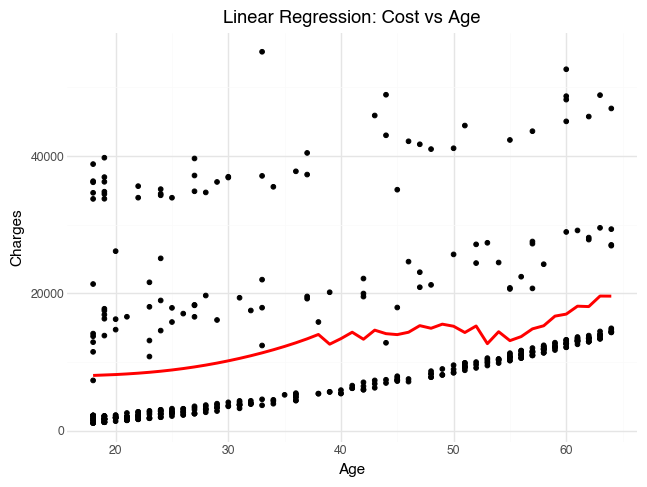

In [20]:
# Data for plotting
X = dat.drop(columns=['charges']) 
y = dat['charges'] 

df_plot = X[['age']].copy()
for power in range(2, 13):
    col_name = f'age{power}'
    df_plot[col_name] = df_plot['age'] ** power

df_plot['charges'] = y 
df_plot['y_test_pred'] = model_library["Poly_Age_Age12"].predict(df_plot[cols_Physical])
df_plot = df_plot.dropna().sort_values('age')

# Plot
Poly_Age_Age12_plot = (
    p9.ggplot(df_plot, p9.aes(x='age', y='charges'))
    + p9.geom_point(shape='o', color='black', stroke=0.4, alpha=1)
    + p9.geom_line(p9.aes(y='y_test_pred'), color='red', size=1.2)
    + p9.scale_size(range=(1, 20))
    + p9.labs(
        title='Linear Regression: Cost vs Age',
        x='Age',
        y='Charges'
    )
    + p9.theme_minimal()
)

Poly_Age_Age12_plot

# Part Four: New data
Great news! We’ve managed to collect data about the insurance costs for a few more individuals. You can find the new dataset here: https://www.dropbox.com/s/sky86agc4s8c6qe/insurance_costs_2.csv?dl=1

Consider the following possible models:

    - Only age as a predictor.
    - age and bmi as a predictor. 
    - age, bmi, and smoker as predictors (no interaction terms)
    - age, and bmi, with both quantitative variables having an interaction term with smoker (i.e. the formula ~ (age + bmi):smoker)
    - age, bmi, and smokeras predictors, with both quantitative variables having an interaction term with smoker (i.e. the formula ~ (age + bmi)*smoker)

For each model, fit the model on the original data.

Then, use the fitted model to predict on the new data.

In [21]:
# Data Import
df2 = pd.read_csv("https://www.dropbox.com/s/sky86agc4s8c6qe/insurance_costs_2.csv?dl=1")
df2.head()

,age,sex,bmi,smoker,region,charges
0,23,male,34.400,no,southwest,1826.84300
1,56,male,40.300,no,southwest,10602.38500
2,18,male,34.100,no,southeast,1137.01100
3,63,female,23.085,no,northeast,14451.83515
4,63,male,28.310,no,northwest,13770.09790


In [22]:
len(df2)

143

In [23]:
#Fix Concerns
dat2 = pd.get_dummies(df2)
dat2.head()

,age,bmi,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,23,34.400,1826.84300,False,True,True,False,False,False,False,True
1,56,40.300,10602.38500,False,True,True,False,False,False,False,True
2,18,34.100,1137.01100,False,True,True,False,False,False,True,False
3,63,23.085,14451.83515,True,False,True,False,True,False,False,False
4,63,28.310,13770.09790,False,True,True,False,False,True,False,False


In [24]:
#Prep Data for training
# Fix the train/test split
X_train2 = dat.drop(columns=['charges'])  
X_test2 = dat2.drop(columns=['charges'])  
y_train2 = dat['charges'] 
y_test2 = dat2['charges'] 

In [25]:
#Model Storage 
model_library2 = {}
records2 = []

## Only age as a predictor.

In [26]:
cols_Physical = ['age']
model_library2["ND_Age_Only"] = LinearRegression().fit(X_train2[cols_Physical], y_train2)

# Train
y_train_pred2 = model_library2["ND_Age_Only"].predict(X_train2[cols_Physical])
mse = mean_squared_error(y_train2, y_train_pred2) 
records2.append({
    "Model": "ND_Age_Only", "Split": "Train",
    "RMSE": np.sqrt(mse), "MSE": mse, "R2": r2_score(y_train2, y_train_pred2)  
})

# Test
y_test_pred2 = model_library2["ND_Age_Only"].predict(X_test2[cols_Physical]) 
mse = mean_squared_error(y_test2, y_test_pred2) 
records2.append({
    "Model": "ND_Age_Only", "Split": "Test",
    "RMSE": np.sqrt(mse), "MSE": mse, "R2": r2_score(y_test2, y_test_pred2)
})

# Display Data - Cumulative 
cumulative_models2 = (pd.DataFrame(records2))
cumulative_models2

,Model,Split,RMSE,MSE,R2
0,ND_Age_Only,Train,11257.853610,1.267393e+08,0.099381
1,ND_Age_Only,Test,11665.210521,1.360771e+08,0.122365


## age and bmi as a predictor.

In [27]:
cols_Physical = ['age', 'bmi']
model_library2["ND_Age_BMI"] = LinearRegression().fit(X_train2[cols_Physical], y_train2)

# Train
y_train_pred2 = model_library2["ND_Age_BMI"].predict(X_train2[cols_Physical])
mse = mean_squared_error(y_train2, y_train_pred2) 
records2.append({
    "Model": "ND_Age_BMI", "Split": "Train",
    "RMSE": np.sqrt(mse), "MSE": mse, "R2": r2_score(y_train2, y_train_pred2)  
})

# Test
y_test_pred2 = model_library2["ND_Age_BMI"].predict(X_test2[cols_Physical]) 
mse = mean_squared_error(y_test2, y_test_pred2) 
records2.append({
    "Model": "New_Data_Age_BMI", "Split": "Test",
    "RMSE": np.sqrt(mse), "MSE": mse, "R2": r2_score(y_test2, y_test_pred2)
})

# Display Data - Cumulative 
cumulative_models2 = (pd.DataFrame(records2))
cumulative_models2

,Model,Split,RMSE,MSE,R2
0,ND_Age_Only,Train,11257.853610,1.267393e+08,0.099381
1,ND_Age_Only,Test,11665.210521,1.360771e+08,0.122365
2,ND_Age_BMI,Train,11126.205084,1.237924e+08,0.120321
3,New_Data_Age_BMI,Test,11516.788012,1.326364e+08,0.144556


## age, bmi, and smoker as predictors (no interaction terms)

In [28]:
# Model: charges <- age + bmi + smoker 
cols_Physical = ['age', 'bmi', 'smoker_yes']
model_library2["ND_Age_Smoker"] = LinearRegression().fit(X_train2[cols_Physical], y_train2)

# Train
y_train_pred2 = model_library2["ND_Age_Smoker"].predict(X_train2[cols_Physical])
mse = mean_squared_error(y_train2, y_train_pred2) 
records2.append({
    "Model": "ND_Age_Smoker", "Split": "Train",
    "RMSE": np.sqrt(mse), "MSE": mse, "R2": r2_score(y_train2, y_train_pred2)  
})

# Test
y_test_pred2 = model_library2["ND_Age_Smoker"].predict(X_test2[cols_Physical]) 
mse = mean_squared_error(y_test2, y_test_pred2) 
records2.append({
    "Model": "ND_Age_Smoker", "Split": "Test",
    "RMSE": np.sqrt(mse), "MSE": mse, "R2": r2_score(y_test2, y_test_pred2)
})

# Display Data - Cumulative 
cumulative_models2 = (pd.DataFrame(records2))
cumulative_models2

,Model,Split,RMSE,MSE,R2
0,ND_Age_Only,Train,11257.853610,1.267393e+08,0.099381
1,ND_Age_Only,Test,11665.210521,1.360771e+08,0.122365
2,ND_Age_BMI,Train,11126.205084,1.237924e+08,0.120321
3,New_Data_Age_BMI,Test,11516.788012,1.326364e+08,0.144556
4,ND_Age_Smoker,Train,5550.865873,3.081211e+07,0.781047
5,ND_Age_Smoker,Test,5947.902256,3.537754e+07,0.771831


## age, and bmi, with both quantitative variables having an interaction term with smoker (i.e. the formula ~ (age + bmi):smoker)

In [29]:
# Create interaction terms
X_train2['age_smoker'] = X_train2['age'] * X_train2['smoker_yes']
X_train2['bmi_smoker'] = X_train2['bmi'] * X_train2['smoker_yes']
X_test2['age_smoker'] = X_test2['age'] * X_test2['smoker_yes']
X_test2['bmi_smoker'] = X_test2['bmi'] * X_test2['smoker_yes']

# Model: charges <- age + bmi + smoker*age + smoker*bmi
cols_Physical = ['age', 'bmi', 'age_smoker', 'bmi_smoker']
model_library2["ND_Age_BMI_Smoker_Interaction"] = LinearRegression().fit(X_train2[cols_Physical], y_train2)

# Train
y_train_pred2 = model_library2["ND_Age_BMI_Smoker_Interaction"].predict(X_train2[cols_Physical])
mse = mean_squared_error(y_train2, y_train_pred2) 
records2.append({
    "Model": "ND_Age_BMI_Smoker_Interaction", "Split": "Train",
    "RMSE": np.sqrt(mse), "MSE": mse, "R2": r2_score(y_train2, y_train_pred2)  
})

# Test
y_test_pred2 = model_library2["ND_Age_BMI_Smoker_Interaction"].predict(X_test2[cols_Physical]) 
mse = mean_squared_error(y_test2, y_test_pred2) 
records2.append({
    "Model": "ND_Age_BMI_Smoker_Interaction", "Split": "Test",
    "RMSE": np.sqrt(mse), "MSE": mse, "R2": r2_score(y_test2, y_test_pred2)
})

# Display Data - Cumulative 
cumulative_models2 = (pd.DataFrame(records2))
cumulative_models2

,Model,Split,RMSE,MSE,R2
0,ND_Age_Only,Train,11257.853610,1.267393e+08,0.099381
1,ND_Age_Only,Test,11665.210521,1.360771e+08,0.122365
2,ND_Age_BMI,Train,11126.205084,1.237924e+08,0.120321
3,New_Data_Age_BMI,Test,11516.788012,1.326364e+08,0.144556
4,ND_Age_Smoker,Train,5550.865873,3.081211e+07,0.781047
5,ND_Age_Smoker,Test,5947.902256,3.537754e+07,0.771831
6,ND_Age_BMI_Smoker_Interaction,Train,4557.834882,2.077386e+07,0.852379
7,ND_Age_BMI_Smoker_Interaction,Test,4979.549017,2.479591e+07,0.840078


## age, bmi, and smokeras predictors, with both quantitative variables having an interaction term with smoker (i.e. the formula ~ (age + bmi)*smoker)

In [30]:
# Create interaction terms
X_train2['age_smoker'] = X_train2['age'] * X_train2['smoker_yes']
X_train2['bmi_smoker'] = X_train2['bmi'] * X_train2['smoker_yes']
X_test2['age_smoker'] = X_test2['age'] * X_test2['smoker_yes']
X_test2['bmi_smoker'] = X_test2['bmi'] * X_test2['smoker_yes']

# Model: charges <- age + bmi + smoker + smoker*age + smoker*bmi
cols_Physical = ['age', 'bmi', 'smoker_yes', 'age_smoker', 'bmi_smoker']
model_library2["ND_Age_BMI_Smoker_Interaction2"] = LinearRegression().fit(X_train2[cols_Physical], y_train2)

# Train
y_train_pred2 = model_library2["ND_Age_BMI_Smoker_Interaction2"].predict(X_train2[cols_Physical])
mse = mean_squared_error(y_train2, y_train_pred2) 
records2.append({
    "Model": "ND_Age_BMI_Smoker_Interaction2", "Split": "Train",
    "RMSE": np.sqrt(mse), "MSE": mse, "R2": r2_score(y_train2, y_train_pred2)  
})

# Test
y_test_pred2 = model_library2["ND_Age_BMI_Smoker_Interaction2"].predict(X_test2[cols_Physical]) 
mse = mean_squared_error(y_test2, y_test_pred2) 
records2.append({
    "Model": "ND_Age_BMI_Smoker_Interaction2", "Split": "Test",
    "RMSE": np.sqrt(mse), "MSE": mse, "R2": r2_score(y_test2, y_test_pred2)
})

# Display Data - Cumulative 
cumulative_models2 = (pd.DataFrame(records2))
cumulative_models2

,Model,Split,RMSE,MSE,R2
0,ND_Age_Only,Train,11257.853610,1.267393e+08,0.099381
1,ND_Age_Only,Test,11665.210521,1.360771e+08,0.122365
2,ND_Age_BMI,Train,11126.205084,1.237924e+08,0.120321
3,New_Data_Age_BMI,Test,11516.788012,1.326364e+08,0.144556
4,ND_Age_Smoker,Train,5550.865873,3.081211e+07,0.781047
5,ND_Age_Smoker,Test,5947.902256,3.537754e+07,0.771831
6,ND_Age_BMI_Smoker_Interaction,Train,4557.834882,2.077386e+07,0.852379
7,ND_Age_BMI_Smoker_Interaction,Test,4979.549017,2.479591e+07,0.840078
8,ND_Age_BMI_Smoker_Interaction2,Train,4321.375334,1.867428e+07,0.867299
9,ND_Age_BMI_Smoker_Interaction2,Test,4667.575052,2.178626e+07,0.859489


## Report the MSE for each model’s new predictions. Based on this, which is the best model to use?

In [31]:
cumulative_models2.sort_values('R2', ascending=False)

,Model,Split,RMSE,MSE,R2
8,ND_Age_BMI_Smoker_Interaction2,Train,4321.375334,1.867428e+07,0.867299
9,ND_Age_BMI_Smoker_Interaction2,Test,4667.575052,2.178626e+07,0.859489
6,ND_Age_BMI_Smoker_Interaction,Train,4557.834882,2.077386e+07,0.852379
7,ND_Age_BMI_Smoker_Interaction,Test,4979.549017,2.479591e+07,0.840078
4,ND_Age_Smoker,Train,5550.865873,3.081211e+07,0.781047
5,ND_Age_Smoker,Test,5947.902256,3.537754e+07,0.771831
3,New_Data_Age_BMI,Test,11516.788012,1.326364e+08,0.144556
1,ND_Age_Only,Test,11665.210521,1.360771e+08,0.122365
2,ND_Age_BMI,Train,11126.205084,1.237924e+08,0.120321
0,ND_Age_Only,Train,11257.853610,1.267393e+08,0.099381


ND_Age_BMI_Smoker_Interaction2 is the best predictive model of all the models. Likely since it has the most relvant variables 

## Make a plot showing the residuals of your final chosen model.

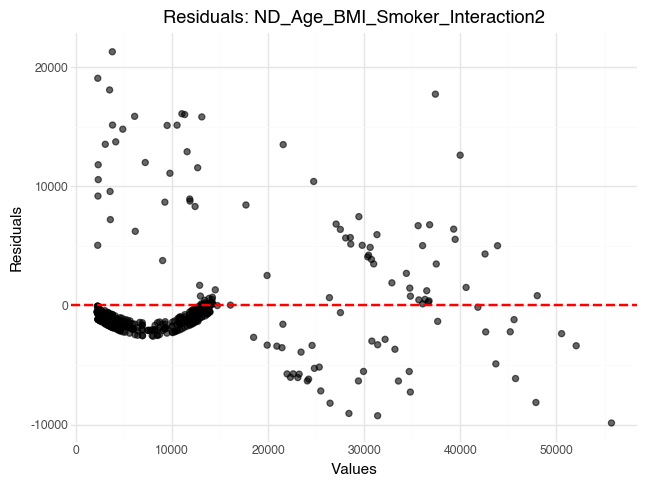

In [32]:
# Calculate residuals
df_residuals = X_train2[cols_Physical].copy()
df_residuals['charges'] = y_train2.values
df_residuals['y_pred'] = model_library2["ND_Age_BMI_Smoker_Interaction2"].predict(X_train2[cols_Physical])
df_residuals['residuals'] = df_residuals['charges'] - df_residuals['y_pred']

# Residual Plot
residual_plot = (
    p9.ggplot(df_residuals, p9.aes(x='y_pred', y='residuals'))
    + p9.geom_point(shape='o', color='black', alpha=0.6, size=2)
    + p9.geom_hline(yintercept=0, color='red', linetype='dashed', size=1)
    + p9.labs(
        title='Residuals: ND_Age_BMI_Smoker_Interaction2',
        x='Values',
        y='Residuals'
    )
    + p9.theme_minimal()
)

residual_plot

# Part Five: Full Exploration

Using any variables in this dataset, and any polynomial of those variables, find the model that best predicts on the new data after being fit on the original data.

Make a plot showing the residuals of your final chosen model.

In [33]:
#Model Storage 
model_library_final = {}
records_final = []

In [34]:
# Create interaction terms
X_train2['age_smoker'] = X_train2['age'] * X_train2['smoker_yes']
X_train2['bmi_smoker'] = X_train2['bmi'] * X_train2['smoker_yes']
X_train2['sex_bmi'] = X_train2['sex_male'] * X_train2['bmi']
X_train2['age_sex'] = X_train2['age'] * X_train2['sex_male']

X_test2['age_smoker'] = X_test2['age'] * X_test2['smoker_yes']
X_test2['bmi_smoker'] = X_test2['bmi'] * X_test2['smoker_yes']
X_test2['sex_bmi'] = X_test2['sex_male'] * X_test2['bmi']
X_test2['age_sex'] = X_test2['age'] * X_test2['sex_male']

# Model: charges <- age + bmi + smoker + sex + smoker*age + smoker*bmi + sex*bmi + age*sex
cols_Physical = ['age', 'bmi', 'smoker_yes', 'sex_male', 'age_smoker', 'bmi_smoker', 'sex_bmi', 'age_sex']
model_library_final["Final_Regression"] = LinearRegression().fit(X_train2[cols_Physical], y_train2)

# Train
y_train_pred_final = model_library_final["Final_Regression"].predict(X_train2[cols_Physical])
mse = mean_squared_error(y_train2, y_train_pred_final) 
records_final.append({
    "Model": "Final_Regression", "Split": "Train",
    "RMSE": np.sqrt(mse), "MSE": mse, "R2": r2_score(y_train2, y_train_pred_final)  
})

# Test
y_test_pred_final = model_library_final["Final_Regression"].predict(X_test2[cols_Physical]) 
mse = mean_squared_error(y_test2, y_test_pred_final) 
records_final.append({
    "Model": "Final_Regression", "Split": "Test",
    "RMSE": np.sqrt(mse), "MSE": mse, "R2": r2_score(y_test2, y_test_pred_final)
})

# Display Data - Cumulative 
cumulative_models_final = (pd.DataFrame(records_final))
cumulative_models_final

,Model,Split,RMSE,MSE,R2
0,Final_Regression,Train,4311.541828,1.858939e+07,0.867902
1,Final_Regression,Test,4675.560820,2.186087e+07,0.859007


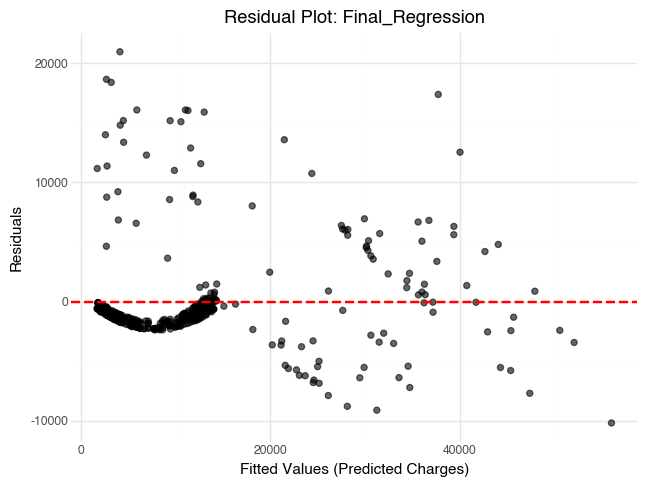

In [35]:
# Calculate residuals
df_residuals = X_train2[cols_Physical].copy()
df_residuals['charges'] = y_train2.values
df_residuals['y_pred'] = model_library_final["Final_Regression"].predict(X_train2[cols_Physical])
df_residuals['residuals'] = df_residuals['charges'] - df_residuals['y_pred']

# Residual Plot
residual_plot = (
    p9.ggplot(df_residuals, p9.aes(x='y_pred', y='residuals'))
    + p9.geom_point(shape='o', color='black', alpha=0.6, size=2)
    + p9.geom_hline(yintercept=0, color='red', linetype='dashed', size=1)
    + p9.labs(
        title='Residual Plot: Final_Regression',
        x='Fitted Values (Predicted Charges)',
        y='Residuals'
    )
    + p9.theme_minimal()
)

residual_plot